In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_excel('data/Monthly Mastersheet.xlsx')

print(df.shape)

# Identify numeric columns only (excludes datetime, strings, etc.)
# added this
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns for PCA:", numeric_cols)


scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_cols])

scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=df.index)
# changed this part  up

print(scaled_df.shape)


print(scaled_df)

print(scaled_df.dtypes)
print(scaled_df.isnull().sum())

print("Before NA drop : " + str(scaled_df.shape))
scaled_df = scaled_df.dropna()
print("AFTER NA drop : " + str(scaled_df.shape))

print(scaled_df.shape)


(90, 17)
Numeric columns for PCA: Index(['Bitcoin', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano',
       'Tether', 'USD Coin', 'LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX',
       'CC'],
      dtype='object')
(90, 16)
     Bitcoin  Litecoin       XRP  Ethereum  Dogecoin   Cardano    Tether  \
0   0.817166  0.765307  1.000136  0.253681 -0.209685       NaN  0.347152   
1   1.015845  1.641138  0.533519  1.852187  0.395931       NaN  0.441591   
2   0.165254 -0.259402  0.445469 -0.785577 -0.196273       NaN  0.171991   
3   1.272642  0.515544  0.327256  0.280961  0.186090       NaN  2.929621   
4   2.958342  4.341531  2.772039  1.965111  0.534414       NaN  2.293614   
..       ...       ...       ...       ...       ...       ...       ...   
85 -0.755514 -1.137969 -0.997432 -0.877390 -0.265769 -0.962275 -0.563012   
86 -0.746934 -1.040631 -0.970973 -0.893253 -0.216468 -1.117291 -0.524741   
87 -0.063788  0.415464  1.150477 -0.119898  0.105480  1.373406 -0.514465   
88 -0.795461  0

In [6]:
dropped_df = df.drop(['Month','Bitcoin', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano','USD Coin','Tether'], axis=1).dropna()
print(dropped_df)

macro_vars = ['LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC']

pca = PCA(n_components=8)

my_data_df_scaled_PCA = pca.fit_transform(scaled_df[macro_vars])


pca_df = pd.DataFrame(my_data_df_scaled_PCA, columns=[f'PC{i+1}' for i in range(8)], index=scaled_df.index)


print(pca_df)



explained_var = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_var))],
    'Eigenvalue': explained_var,
    'Explained Variance (%)': explained_var_ratio * 100,
    'Cumulative Variance (%)': cumulative_var_ratio * 100
})

print(summary_df)


        LFPR       CPI         r        M1       GDP        IM        EX  \
0   0.003175  0.005093 -0.008658 -0.005094  0.005560  0.039663 -0.022493   
1  -0.006359  0.000775  0.000000  0.011245  0.000723  0.000000  0.000000   
2   0.000000  0.002664  0.008658  0.005010  0.007803  0.000000  0.000000   
3   0.000000  0.002105  0.113944 -0.002599  0.003164  0.019355  0.015276   
4   0.000000  0.004244  0.081225  0.012789  0.001475  0.000000  0.000000   
..       ...       ...       ...       ...       ...       ...       ...   
83  0.000000  0.001800  0.000000  0.003006  0.000509  0.000000  0.000000   
84  0.000000  0.002289 -0.038246  0.003625 -0.000910 -0.005530  0.000198   
85 -0.003195  0.002262 -0.060259  0.003206  0.005831  0.000000  0.000000   
86  0.000000  0.002801 -0.040132  0.006168  0.002537  0.000000  0.000000   
87  0.000000  0.003640 -0.035091  0.001701 -0.003102  0.093925  0.018554   

          CC  
0   0.057217  
1   0.057217  
2  -0.022089  
3  -0.026751  
4  -0.002088

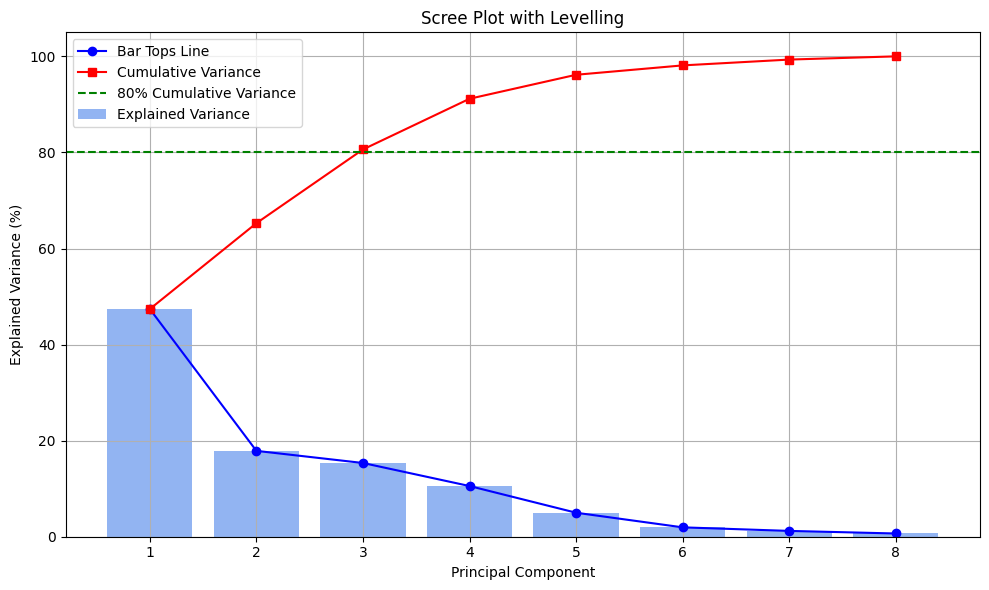

In [7]:

explained_variance_ratio = pca.explained_variance_ratio_[:20]
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = len(explained_variance_ratio)
avg_explained = 1.0 / n_components  # average variance threshold

x_vals = np.arange(1, n_components + 1)
y_vals = explained_variance_ratio * 100

plt.figure(figsize=(10, 6))

plt.bar(x_vals, y_vals, alpha=0.7, color='cornflowerblue', label='Explained Variance')

plt.plot(x_vals, y_vals, marker='o', color='blue', label='Bar Tops Line')

plt.plot(x_vals, cumulative_variance * 100, marker='s', color='red', label='Cumulative Variance')

# 80% line
plt.axhline(y=80, color='green', linestyle='--', label='80% Cumulative Variance')

# Plot formatting
plt.title('Scree Plot with Levelling')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(x_vals)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
#added this
loading_df = pd.DataFrame(
    pca.components_.T,
    index=macro_vars,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

cutoff = 0.5

filtered_loading_df = loading_df[(loading_df.abs() >= cutoff).any(axis=1)]

print(filtered_loading_df)

pc = 'PC1'
print(filtered_loading_df[pc].sort_values(key=abs, ascending=False))

print("Loadings : ")
print(loading_df)
print("Loading Dim : ")
print(loading_df.shape)

# select num_PC = 3
num_PC = 3

           PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
LFPR  0.416814 -0.397424  0.037740  0.047966 -0.229760 -0.335460 -0.685980  0.169420
CPI   0.306273 -0.036353 -0.476101 -0.381767  0.685365 -0.246505  0.044119 -0.004634
r     0.426191 -0.316785 -0.275774 -0.022809 -0.139417  0.769624  0.055804 -0.162985
M1    0.009720 -0.282593  0.762344 -0.412457  0.355027  0.200372 -0.041381 -0.029195
GDP   0.465246 -0.211633  0.182220 -0.002819 -0.279297 -0.390909  0.687060 -0.051750
IM    0.353653  0.563573  0.161363 -0.106972 -0.084458 -0.051876 -0.224040 -0.678097
EX    0.366296  0.543371  0.114808 -0.186905 -0.088183  0.186375  0.010487  0.692704
CC    0.273921  0.053525  0.205575  0.796824  0.488966  0.063208  0.017422  0.039070
GDP     0.465246
r       0.426191
LFPR    0.416814
EX      0.366296
IM      0.353653
CPI     0.306273
CC      0.273921
M1      0.009720
Name: PC1, dtype: float64
Loadings : 
           PC1       PC2       PC3       PC4       PC5       

In [ ]:
scores = pd.DataFrame(my_data_df_scaled_PCA[:, :num_PC], columns=[f'PC{i+1}' for i in range(num_PC)], index=scaled_df.index)

print("PCA scores : ")

print(scores)

print("PCA scores shape : ")

print(scores.shape)

loadings_times_sd = pca.components_.T[:, :num_PC] * np.sqrt(pca.explained_variance_[:num_PC])

loadings_times_sd_df = pd.DataFrame(loadings_times_sd)

print("loadings_times_sd_df shape : ")
print(loadings_times_sd_df.shape)


print("original data df.shape : ")
print(df.shape)

loadings_times_sd_mat = np.array(loadings_times_sd_df)

df_mat = np.array(dropped_df)

new_data_mat = np.matmul(df_mat, loadings_times_sd_mat)

print(new_data_mat)



new_data_df = pd.DataFrame(new_data_mat, columns=[f'PC{i+1}' for i in range(num_PC)])

print("new_data_df shape : ")
print(new_data_df.shape)

print("new_data_df  : ")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) # Adjust width as needed
print(new_data_df)

PCA scores : 
          PC1       PC2       PC3
16  -0.507986 -0.312131  0.259289
17  -0.110272  0.008481 -0.065215
18   0.249474  0.268623 -0.064876
19  -0.269900  0.093338 -0.206106
20  -0.135516 -0.129708  0.449327
21  -0.458225 -0.572701  0.417931
22   0.086700 -0.258074  0.096488
23  -0.878170  0.001442 -0.010226
24  -0.204401 -0.441039  0.270679
25  -0.044301 -0.075045  0.129385
26  -0.123490  0.022376  0.172378
27  -0.910014 -1.370789 -0.276226
28  -0.286865 -0.002208  0.014805
29  -0.269123 -0.062470  0.340379
30  -9.953629 -5.216975 -0.764289
31 -11.771533  6.534644  2.223737
32   1.834783 -4.158894  8.333526
33   6.561859  2.731144  1.466450
34   0.582023 -0.588965 -0.472701
35   0.659482 -0.511794 -0.108740
36   1.440762  2.560540  1.034181
37   0.318892 -0.494083  0.382596
38  -1.094953  0.277806 -0.291948
39   1.345038  1.277786  0.314877
40   0.044267 -0.189687  0.178802
41  -0.839205  0.215888 -0.326829
42   2.077869  1.166783  0.731789
43   0.713438 -0.306028 -0.416291


In [ ]:
#new_data_df.to_excel("macro_PCA.xlsx", index=False)